In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.77081282, -0.69961025,  0.40222186,  0.74199215,  0.9465586 ,
       -0.89066195,  0.45994272, -0.04067992, -0.79000969,  0.38862003])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([-0.15589469,  0.434039  , -0.28975262,  0.31594407, -0.78586529,
       -0.33024437, -0.40857064,  0.43828956, -0.37347948,  0.82794429])

In [4]:
y = 0.3 * x1 + 0.5 * x2 + 0.1
y = y > 0.0

print(y.shape)
y[0:10]

(100,)


array([ True,  True,  True,  True, False, False,  True,  True, False,
        True])

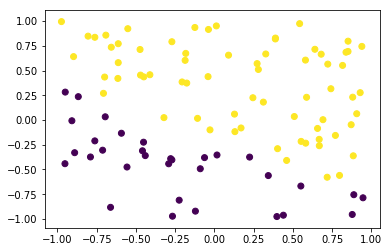

In [5]:
plt.scatter(x1, x2, c=y)

### Define Sigmoid

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

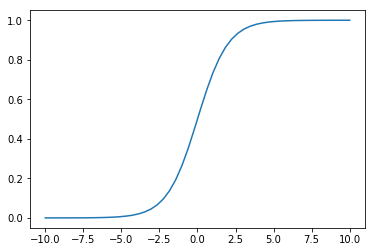

In [7]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [8]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    accuracy = (predict == y).mean()

    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.6f}".format(epoch, accuracy))
    
    if accuracy > 0.95:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print("w1 = {0:.6f}, w2 = {1:.6f} b = {2:.6f}".format(w1, w2, b))
print("{0:2} accuracy = {1:.6f}".format(epoch, accuracy))

 0 accuracy = 0.260000
10 accuracy = 0.740000
20 accuracy = 0.930000
----------------------------------------
w1 = 0.955404, w2 = 2.074442 b = 0.705492
22 accuracy = 0.960000


In [9]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = y_predict > 0.5

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})
result.head(10)

,x1,x2,y(actual),y(predict)
0,0.770813,-0.155895,True,True
1,-0.699610,0.434039,True,True
2,0.402222,-0.289753,True,True
3,0.741992,0.315944,True,True
4,0.946559,-0.785865,False,False
5,-0.890662,-0.330244,False,False
6,0.459943,-0.408571,True,True
7,-0.040680,0.438290,True,True
8,-0.790010,-0.373479,False,False
9,0.388620,0.827944,True,True


### Visualize Decision Boundary

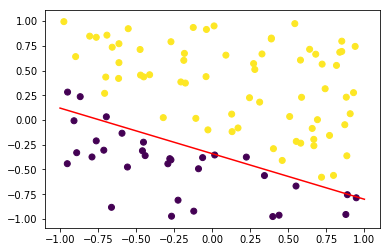

In [10]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.scatter(x1, x2, c=y)
plt.plot(xx, yy, c='r')